In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import  datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [20]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

In [21]:
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

In [22]:
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankel Boot"
}

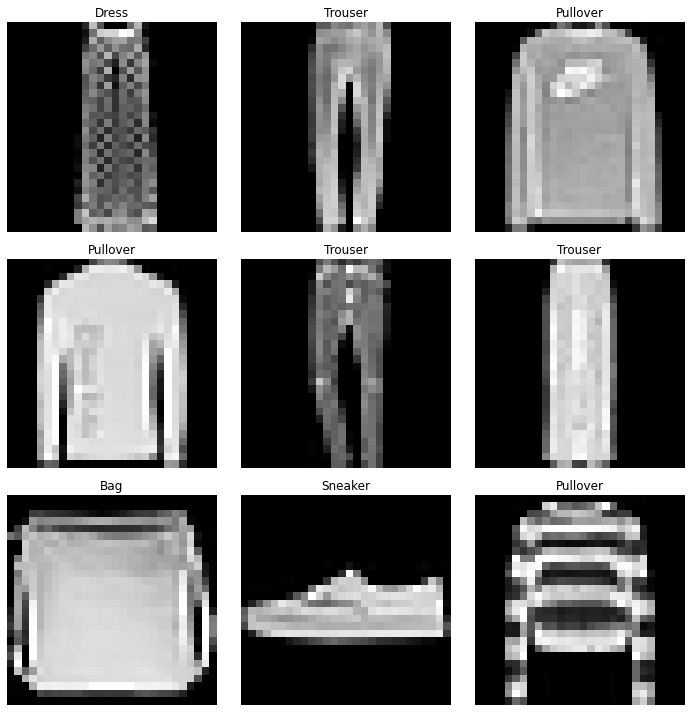

In [23]:
figure = plt.figure(figsize = (10, 10))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

In [24]:
import os
import pandas as pd
from torchvision.io import read_image



In [25]:
class CustomImageDatasetsCreate:
    def __init__(self, annotations_files, img_dir, transform = None, target_transform = None):
        self.image_labels = pd.read_csv(annotations_files)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)


    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transfrom:
            image = self.trainsform(image)
        if self.target_transform(label):
            label = self.target_transform(label)

        return image, label




In [26]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [27]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch Shape: {train_features.size()}")
print(f"labels batch Shape: {train_labels.size()}")

Features batch Shape: torch.Size([64, 1, 28, 28])
labels batch Shape: torch.Size([64])


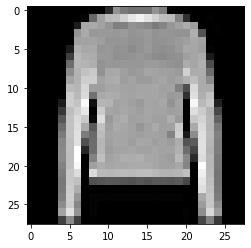

Labels: 2


In [28]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"Labels: {label}")